In [122]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video


In [3]:
type(data)

dict

In [21]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [23]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973879e+07,1.973879e+07,False,NaN,1,NaN,NaN,None,2024-08-12T06:16:00.000Z,58443.883208,2.536040e+10,73.3451,-0.201422,-4.358765,13.813300,0.723448,-13.380842,-5.394707,1.153612e+12,56.2614,1.227322e+12,None,2024-08-12T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 11:49:18.625973
1,1027,Ethereum,ETH,ethereum,9204,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202703e+08,1.202703e+08,True,NaN,2,NaN,NaN,None,2024-08-12T06:16:00.000Z,2549.217815,1.489860e+10,66.6506,0.173510,-4.096646,11.834942,-18.616653,-27.167102,-12.063943,3.065951e+11,14.9478,3.065951e+11,None,2024-08-12T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 11:49:18.625973
2,825,Tether USDt,USDT,tether,93938,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.156386e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-12T06:16:00.000Z,1.000797,4.557859e+10,53.9621,0.042177,0.057430,0.063412,0.053274,0.081128,0.133639,1.157307e+11,5.6424,1.171614e+11,None,2024-08-12T06:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-12 11:49:18.625973
3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459365e+08,1.459365e+08,False,NaN,4,NaN,NaN,None,2024-08-12T06:16:00.000Z,505.896430,1.594857e+09,11.5915,-0.284327,-4.747276,18.474983,-5.451164,-16.864363,-13.569304,7.382877e+10,3.6006,7.382877e+10,None,2024-08-12T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 11:49:18.625973
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.667336e+08,5.821099e+08,True,NaN,5,NaN,NaN,None,2024-08-12T06:16:00.000Z,142.917889,2.654575e+09,92.3258,-0.604597,-8.159716,20.463504,2.886284,-5.901852,-1.132388,6.670458e+10,3.2521,8.319392e+10,None,2024-08-12T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 11:49:18.625973
5,3408,USDC,USDC,usd-coin,21472,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.448251e+10,3.448251e+10,False,NaN,6,NaN,NaN,None,2024-08-12T06:16:00.000Z,1.000318,4.815039e+09,87.3026,0.013680,0.026221,0.013297,0.034111,0.017538,0.044794,3.449347e+10,1.6817,3.449347e+10,None,2024-08-12T06:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-12 11:49:18.625973
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.610436e+10,9.998737e+10,False,NaN,7,NaN,NaN,None,2024-08-12T06:16:00.000Z,0.562764,1.318648e+09,28.3366,-0.116505,-4.843320,21.874037,11.397232,15.684707,12.273083,3.157353e+10,1.5393,5.627643e+10,None,2024-08-12T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 11:49:18.625973
7,11419,Toncoin,TON,toncoin,501,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.518488e+09,5.110366e+09,True,NaN,8,3.414167e+09,2.078187e+10,None,2024-08-12T06:16:00.000Z,6.086953,3.250371e+08,16.9611,-0.067587,-8.413460,16.940403,-17.295238,-19.916666,-13.409119,1.532992e+10,0.7475,3.110656e+10,None,2024-08-12T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 11:49:18.625973
8,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchang

In [57]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\jmsrs\OneDrive\Documents\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\jmsrs\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\jmsrs\OneDrive\Documents\Python Scripts\API.csv', header=False)
        
# If that didn't work try using the local host URL as shown in the video


     

In [61]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60) #Sleep for 1 minute
exit()

API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [64]:
df72 = pd.read_csv(r'C:\Users\jmsrs\OneDrive\Documents\Python Scripts\API.csv')
df72

,0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'paradigm-portfolio', 'bitcoin-ecosystem', 'ftx-bankruptcy-estate']",21000000.0,19738806.0,19738806.0.1,False,Unnamed: 12,1.1,Unnamed: 14,Unnamed: 15,Unnamed: 16,2024-08-12T07:39:00.000Z,58740.86220643107,26970752825.57569,84.8391,0.68769684,-4.03414505,11.41088611,1.0422396,-13.18601408,-5.07472669,1159474483365.4749,56.2641,1233558106335.05,Unnamed: 30,2024-08-12T07:39:00.000Z.1,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,2024-08-12 13:10:22.308203
0,1,1027,Ethereum,ETH,ethereum,9204,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202703e+08,1.202703e+08,True,NaN,2,NaN,NaN,NaN,2024-08-12T07:38:00.000Z,2571.293484,1.543130e+10,73.5792,0.786457,-4.022475,9.223650,-18.079693,-26.601748,-11.751577,3.092502e+11,15.0682,3.092502e+11,NaN,2024-08-12T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:10:22.308203
1,2,825,Tether USDt,USDT,tether,93944,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.156386e+11,1.170681e+11,True,NaN,3,NaN,NaN,NaN,2024-08-12T07:38:00.000Z,1.000306,4.778221e+10,62.0277,0.008089,0.010574,0.014343,0.010607,0.030767,0.082950,1.156740e+11,5.6362,1.171039e+11,NaN,2024-08-12T07:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-12 13:10:22.308203
2,3,1839,BNB,BNB,bnb,2207,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459365e+08,1.459365e+08,False,NaN,4,NaN,NaN,NaN,2024-08-12T07:38:00.000Z,509.015463,1.627126e+09,13.2437,0.852689,-4.577332,16.370906,-4.960359,-16.156374,-13.348911,7.428395e+10,3.6077,7.428395e+10,NaN,2024-08-12T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:10:22.308203
3,4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.667333e+08,5.821097e+08,True,NaN,5,NaN,NaN,NaN,2024-08-12T07:38:00.000Z,145.331762,2.771851e+09,103.8420,1.860609,-7.030907,19.334800,4.349043,-4.308655,-0.397262,6.783118e+10,3.3051,8.459903e+10,NaN,2024-08-12T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:10:22.308203
4,5,3408,USDC,USDC,usd-coin,21472,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.455264e+10,3.455264e+10,False,NaN,6,NaN,NaN,NaN,2024-08-12T07:38:00.000Z,0.999996,5.226854e+09,104.4421,-0.003836,0.018166,-0.009127,0.007813,-0.017989,0.003983,3.455249e+10,1.6836,3.455249e+10,NaN,2024-08-12T07:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-12 13:10:22.308203
5,6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.610436e+10,9.998737e+10,False,NaN,7,NaN,NaN,NaN,2024-08-12T07:39:00.000Z,0.567535,1.385122e+09,34.4779,0.681720,-3.909204,20.932969,10.798178,16.476545,12.431829,3.184119e+10,1.5515,5.675349e+10,NaN,2024-08-12T07:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:10:22.308203
6,7,11419,Toncoin,TON,toncoin,502,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.518485e+09,5.110363e+09,True,NaN,8,3.414167e+09,2.099699e+10,NaN,2024-08-12T07:38:00.000Z,6.149962,3.361844e+08,21.9896,1.057802,-6.973230,18.050734,-16.151116,-18.923419,-12.254474,1.548858e+10,0.7526,3.142854e+10,NaN,2024-08-12T07:38:00.000Z,NaN

In [55]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973879e+07,1.973879e+07,False,NaN,1,NaN,NaN,None,2024-08-12T06:16:00.000Z,58443.883208,2.536040e+10,73.3451,-0.201422,-4.358765,13.813300,0.723448,-13.380842,-5.394707,1.153612e+12,56.2614,1.227322e+12,None,2024-08-12T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 11:49:18.625973
1,1027,Ethereum,ETH,ethereum,9204,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202703e+08,1.202703e+08,True,NaN,2,NaN,NaN,None,2024-08-12T06:16:00.000Z,2549.217815,1.489860e+10,66.6506,0.173510,-4.096646,11.834942,-18.616653,-27.167102,-12.063943,3.065951e+11,14.9478,3.065951e+11,None,2024-08-12T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 11:49:18.625973
2,825,Tether USDt,USDT,tether,93938,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.156386e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-12T06:16:00.000Z,1.000797,4.557859e+10,53.9621,0.042177,0.057430,0.063412,0.053274,0.081128,0.133639,1.157307e+11,5.6424,1.171614e+11,None,2024-08-12T06:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-12 11:49:18.625973
3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459365e+08,1.459365e+08,False,NaN,4,NaN,NaN,None,2024-08-12T06:16:00.000Z,505.896430,1.594857e+09,11.5915,-0.284327,-4.747276,18.474983,-5.451164,-16.864363,-13.569304,7.382877e+10,3.6006,7.382877e+10,None,2024-08-12T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 11:49:18.625973
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.667336e+08,5.821099e+08,True,NaN,5,NaN,NaN,None,2024-08-12T06:16:00.000Z,142.917889,2.654575e+09,92.3258,-0.604597,-8.159716,20.463504,2.886284,-5.901852,-1.132388,6.670458e+10,3.2521,8.319392e+10,None,2024-08-12T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 11:49:18.625973
5,3408,USDC,USDC,usd-coin,21472,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.448251e+10,3.448251e+10,False,NaN,6,NaN,NaN,None,2024-08-12T06:16:00.000Z,1.000318,4.815039e+09,87.3026,0.013680,0.026221,0.013297,0.034111,0.017538,0.044794,3.449347e+10,1.6817,3.449347e+10,None,2024-08-12T06:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-12 11:49:18.625973
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.610436e+10,9.998737e+10,False,NaN,7,NaN,NaN,None,2024-08-12T06:16:00.000Z,0.562764,1.318648e+09,28.3366,-0.116505,-4.843320,21.874037,11.397232,15.684707,12.273083,3.157353e+10,1.5393,5.627643e+10,None,2024-08-12T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 11:49:18.625973
7,11419,Toncoin,TON,toncoin,501,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.518488e+09,5.110366e+09,True,NaN,8,3.414167e+09,2.078187e+10,None,2024-08-12T06:16:00.000Z,6.086953,3.250371e+08,16.9611,-0.067587,-8.413460,16.940403,-17.295238,-19.916666,-13.409119,1.532992e+10,0.7475,3.110656e+10,None,2024-08-12T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 11:49:18.625973
8,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchang

In [66]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [72]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19738806.00000,19738806.00000,False,NaN,1,NaN,NaN,None,2024-08-12T07:39:00.000Z,58740.86221,26970752825.57569,84.83910,0.68770,-4.03415,11.41089,1.04224,-13.18601,-5.07473,1159474483365.47485,56.26410,1233558106335.05005,None,2024-08-12T07:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:10:22.308203
1,1027,Ethereum,ETH,ethereum,9204,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120270277.79627,120270277.79627,True,NaN,2,NaN,NaN,None,2024-08-12T07:38:00.000Z,2571.29348,15431303340.96645,73.57920,0.78646,-4.02248,9.22365,-18.07969,-26.60175,-11.75158,309250181612.95898,15.06820,309250181612.96002,None,2024-08-12T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:10:22.308203
2,825,Tether USDt,USDT,tether,93944,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,115638558844.54697,117068077122.29233,True,NaN,3,NaN,NaN,None,2024-08-12T07:38:00.000Z,1.00031,47782207284.79144,62.02770,0.00809,0.01057,0.01434,0.01061,0.03077,0.08295,115673987792.22491,5.63620,117103944040.91000,None,2024-08-12T07:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-12 13:10:22.308203
3,1839,BNB,BNB,bnb,2207,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936525.15114,145936525.15114,False,NaN,4,NaN,NaN,None,2024-08-12T07:38:00.000Z,509.01546,1627125658.37184,13.24370,0.85269,-4.57733,16.37091,-4.96036,-16.15637,-13.34891,74283947893.70636,3.60770,74283947893.71001,None,2024-08-12T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:10:22.308203
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466733346.90868,582109734.14276,True,NaN,5,NaN,NaN,None,2024-08-12T07:38:00.000Z,145.33176,2771851248.09109,103.84200,1.86061,-7.03091,19.33480,4.34904,-4.30865,-0.39726,67831179817.40807,3.30510,84599033498.73000,None,2024-08-12T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:10:22.308203
5,3408,USDC,USDC,usd-coin,21472,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34552642001.29676,34552642001.29676,False,NaN,6,NaN,NaN,None,2024-08-12T07:38:00.000Z,1.00000,5226853616.21949,104.44210,-0.00384,0.01817,-0.00913,0.00781,-0.01799,0.00398,34552490199.75958,1.68360,34552490199.76000,None,2024-08-12T07:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-12 13:10:22.308203
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56104361423.00000,99987365591.00000,False,NaN,7,NaN,NaN,None,2024-08-12T07:39:00.000Z,0.56753,1385122027.81565,34.47790,0.68172,-3.90920,20.93297,10.79818,16.47654,12.43183,31841185897.19054,1.55150,56753494896.99000,None,2024-08-12T07:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:10:22.308203
7,11419,Toncoin,TON,toncoin,502,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2518484604.00096,5110362806.17472,True,NaN,8,3414166606.00000,20996994860.25854,None,2024-08-12T07:38:00.000Z,6.14996,336184403.52860,21.98960,1.05780,-6.97323,18.05073,-16.15112,-18.92342,-12.25447,15488584591.30753,0.75260,31428537021.81000,None,2024

In [74]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.68770,-4.03415,11.41089,1.04224,-13.18601,-5.07473
Ethereum,0.78646,-4.02248,9.22365,-18.07969,-26.60175,-11.75158
Tether USDt,0.00809,0.01057,0.01434,0.01061,0.03077,0.08295
BNB,0.85269,-4.57733,16.37091,-4.96036,-16.15637,-13.34891
Solana,1.86061,-7.03091,19.33480,4.34904,-4.30865,-0.39726
USDC,-0.00384,0.01817,-0.00913,0.00781,-0.01799,0.00398
XRP,0.68172,-3.90920,20.93297,10.79818,16.47654,12.43183
Toncoin,1.05780,-6.97323,18.05073,-16.15112,-18.92342,-12.25447
Dogecoin,1.32024,-6.42676,15.45340,-5.88394,-28.47339,-31.92785


In [76]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.68770
              quote.USD.percent_change_24h    -4.03415
              quote.USD.percent_change_7d     11.41089
              quote.USD.percent_change_30d     1.04224
              quote.USD.percent_change_60d   -13.18601
              quote.USD.percent_change_90d    -5.07473
Ethereum      quote.USD.percent_change_1h      0.78646
              quote.USD.percent_change_24h    -4.02248
              quote.USD.percent_change_7d      9.22365
              quote.USD.percent_change_30d   -18.07969
              quote.USD.percent_change_60d   -26.60175
              quote.USD.percent_change_90d   -11.75158
Tether USDt   quote.USD.percent_change_1h      0.00809
              quote.USD.percent_change_24h     0.01057
              quote.USD.percent_change_7d      0.01434
              quote.USD.percent_change_30d     0.01061
              quote.USD.percent_change_60d     0.03077
              quote.US

In [80]:
type(df4)

pandas.core.series.Series

In [82]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.68770
             quote.USD.percent_change_24h  -4.03415
             quote.USD.percent_change_7d   11.41089
             quote.USD.percent_change_30d   1.04224
             quote.USD.percent_change_60d -13.18601
             quote.USD.percent_change_90d  -5.07473
Ethereum     quote.USD.percent_change_1h    0.78646
             quote.USD.percent_change_24h  -4.02248
             quote.USD.percent_change_7d    9.22365
             quote.USD.percent_change_30d -18.07969
             quote.USD.percent_change_60d -26.60175
             quote.USD.percent_change_90d -11.75158
Tether USDt  quote.USD.percent_change_1h    0.00809
             quote.USD.percent_change_24h   0.01057
             quote.USD.percent_change_7d    0.01434
             quote.USD.percent_change_30d   0.01061
             quote.USD.percent_change_60d   0.03077
             quote.USD.percent_change_90d   0.08295
BNB          quote.USD.percent_change_1h    0.85269
             quote.USD.percent_change_24h  -4.57733
             quote.USD.percent_change_7d   16.37091
             quote.USD.percent_change_30d  -4.96036
             quote.USD.percent_change_60d -16.15637
             quote.USD.percent_change_90d -13.34891
Solana       quote.USD.percent_change_1h    1.86061
             quote.USD.percent_change_24h  -7.03091
             quote.USD.percent_change_7d   19.33480
             quote.USD.percent_change_30d   4.34904
             quote.USD.percent_change_60d  -4.30865
             quote.USD.percent_change_90d  -0.39726
USDC         quote.USD.percent_change_1h   -0.00384
             quote.USD.percent_change_24h   0.01817
             quote.USD.percent_change_7d   -0.00913
             quote.USD.percent_change_30d   0.00781
             quote.USD.percent_change_60d  -0.01799
             quote.USD.percent_change_90d   0.00398
XRP          quote.USD.percent_change_1h    0.68172
             quote.USD.percent_change_24h  -3.90920
             quote.USD.percent_change_7d   20.93297
             quote.USD.percent_change_30d  10.79818
             quote.USD.percent_change_60d  16.47654
             quote.USD.percent_change_90d  12.43183
Toncoin      quote.USD.percent_change_1h    1.05780
             quote.USD.percent_change_24h  -6.97323
             quote.USD.percent_change_7d   18.05073
             quote.USD.percent_change_30d -16.15112
             quote.USD.percent_change_60d -18.92342
             quote.USD.percent_change_90d -12.25447
Dogecoin     quote.USD.percent_change_1h    1.32024
             quote.USD.percent_change_24h  -6.42676
             quote.USD.percent_change_7d   15.45340
             quote.USD.percent_change_30d  -5.88394
             quote.USD.percent_change_60d -28.47339
             quote.USD.percent_change_90d -31.92785
Cardano      quote.USD.percent_change_1h    0.56206
             quote.USD.percent_change_24h  -5.57734
             quote.USD.percent_change_7d    8.64993
             quote.USD.percent_change_30d -21.57454
             quote.USD.percent_change_60d -22.66754
             quote.USD.percent_change_90d -23.59163
TRON         quote.USD.percent_change_1h    0.09066
             quote.USD.percent_change_24h  -0.76113
             quote.USD.percent_change_7d    6.00115
             quote.USD.percent_change_30d  -8.62649
             quote.USD.percent_change_60d  10.13677
             quote.USD.percent_change_90d   2.35202
Avalanche    quote.USD.percent_change_1h    0.86876
             quote.USD.percent_change_24h  -5.61118
             quote.USD.percent_change_7d   10.01111
             quote.USD.percent_change_30d -19.30375
             quote.USD.percent_change_60d -35.42163
             quote.USD.percent_change_90d -35.81891
Shiba Inu    quote.USD.percent_change_1h    1.01346
             quote.USD.percent_change_24h  -5.56661
             quote.USD.percent_change_7d   13.97600
             quote.USD.percent_change_30d

In [84]:
type(df5)

pandas.core.frame.DataFrame

In [88]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.68770
1,Bitcoin,quote.USD.percent_change_24h,-4.03415
2,Bitcoin,quote.USD.percent_change_7d,11.41089
3,Bitcoin,quote.USD.percent_change_30d,1.04224
4,Bitcoin,quote.USD.percent_change_60d,-13.18601
5,Bitcoin,quote.USD.percent_change_90d,-5.07473
6,Ethereum,quote.USD.percent_change_1h,0.78646
7,Ethereum,quote.USD.percent_change_24h,-4.02248
8,Ethereum,quote.USD.percent_change_7d,9.22365
9,Ethereum,quote.USD.percent_change_30d,-18.07969


In [92]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.68770
1,Bitcoin,quote.USD.percent_change_24h,-4.03415
2,Bitcoin,quote.USD.percent_change_7d,11.41089
3,Bitcoin,quote.USD.percent_change_30d,1.04224
4,Bitcoin,quote.USD.percent_change_60d,-13.18601
5,Bitcoin,quote.USD.percent_change_90d,-5.07473
6,Ethereum,quote.USD.percent_change_1h,0.78646
7,Ethereum,quote.USD.percent_change_24h,-4.02248
8,Ethereum,quote.USD.percent_change_7d,9.22365
9,Ethereum,quote.USD.percent_change_30d,-18.07969


In [102]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.68770
1,Bitcoin,24h,-4.03415
2,Bitcoin,7d,11.41089
3,Bitcoin,30d,1.04224
4,Bitcoin,60d,-13.18601
5,Bitcoin,90d,-5.07473
6,Ethereum,1h,0.78646
7,Ethereum,24h,-4.02248
8,Ethereum,7d,9.22365
9,Ethereum,30d,-18.07969


In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

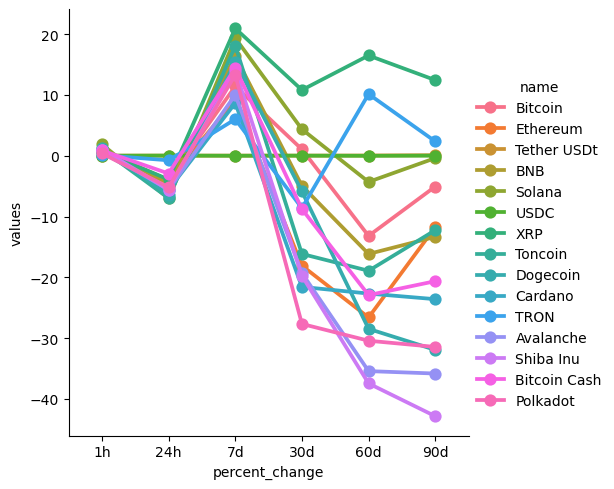

In [106]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [124]:
df10 = df[['name','quote.USD.price','timestamp']]
df10

,name,quote.USD.price,timestamp
0,Bitcoin,58740.86221,2024-08-12 13:10:22.308203
1,Ethereum,2571.29348,2024-08-12 13:10:22.308203
2,Tether USDt,1.00031,2024-08-12 13:10:22.308203
3,BNB,509.01546,2024-08-12 13:10:22.308203
4,Solana,145.33176,2024-08-12 13:10:22.308203
5,USDC,1.00000,2024-08-12 13:10:22.308203
6,XRP,0.56753,2024-08-12 13:10:22.308203
7,Toncoin,6.14996,2024-08-12 13:10:22.308203
8,Dogecoin,0.10277,2024-08-12 13:10:22.308203
9,Cardano,0.33300,2024-08-12 13:10:22.308203


In [126]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,58740.86221,2024-08-12 13:10:22.308203
